In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\RICKY/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\RICKY/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RICKY/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\RICKY/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
df = pd.read_csv('spam.csv')

In [19]:
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
# Initialize tools 
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [21]:
# custom text processing function
def preprocess(text):
    # Lowercasing
    text = text.lower()

    # Removing punctuation and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Tokenization
    tokens = word_tokenize(text)

    #stopwords removal 
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(cleaned)

In [22]:
# Apply preprocessing 
df['clean_text'] = df['Message'].apply(preprocess)

In [23]:
df

,Category,Message,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u pound prize claim ea...
5568,ham,Will ü b going to esplanade fr home?,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestion
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like id interested buying s...


In [25]:
# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['Category']
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
spam_classifier = MultinomialNB()
spam_classifier.fit(X_train, y_train)

MultinomialNB()

In [26]:
import pickle

with open('spam-classifier.pkl', 'wb') as model_file:
    pickle.dump(spam_classifier, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

In [28]:
# Predict and Evaluate 
y_pred = spam_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



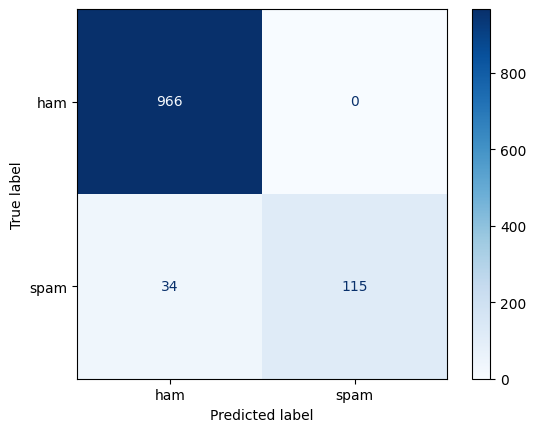

In [29]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['Category'].unique())
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### Model Check

In [30]:
sample_text = "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."

#preprocess using the same steps
sample_text_cleaned = preprocess(sample_text)

#Vectorize
sample_vector = vectorizer.transform([sample_text_cleaned])

#predict
predicted_category = spam_classifier.predict(sample_vector)
print("Predicted Category:", predicted_category[0])

Predicted Category: ham
